# TOPIC MODELLING

In [ ]:
import pandas as pd
dataset_path = 'results-survey173122.csv'
data = pd.read_csv(dataset_path,encoding = "ISO-8859-1")

data_text = data[['Group_1','Group_2','Group_3','Group_4']]
data_text['index'] = data_text.index
documents = data_text

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(len(documents))
print(documents[:5])

48
                                             Group_1  ... index
0  "This group has to do with the speed of the tr...  ...     0
1     "contains items relating to speed of movement"  ...     1
2  "All involve speed and velocity, most simple q...  ...     2
3  "This is about how you perceive your perceptio...  ...     3
4  "These instructions are based on the assumptio...  ...     4

[5 rows x 5 columns]


Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

Words that have fewer than 3 characters are removed.
All stopwords are removed( the, he,have etc).

Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.(changing , changes, changed -> changed)

Words are stemmed — words are reduced to their root form.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Lemmitization and stem processing steps

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

Selecting a document to preview after preprocessing.


In [ ]:
stemmer = SnowballStemmer('english')
doc_sample = documents[documents['index'] == 47].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['"rating', 'the', 'train,', 'describing', 'the', 'train', 'only"']


 tokenized and lemmatized document: 
['rat', 'train', 'describ', 'train']


In [ ]:
processed_docs_1 = documents['Group_1'].map(preprocess)
processed_docs_1[:15]

0                                 [group, speed, train]
1               [contain, item, relat, speed, movement]
2               [involv, speed, veloc, simpl, question]
3                          [perceiv, percept, movement]
4     [instruct, base, assumpt, felt, realist, sens,...
5       [rat, physic, properti, object, virtual, space]
6                              [feel, percept, environ]
7                                      [sentenc, speed]
8     [group, base, actual, speed, self, sentenc, ve...
9     [group, refer, sentenc, relat, actual, speed, ...
10                                      [person, speed]
11                                     [quantiti, fast]
12                                               [move]
13                                   [actual, movement]
14    [sentenc, refer, concret, fact, speed, veloc, ...
Name: Group_1, dtype: object

In [ ]:
processed_docs_2 = documents['Group_2'].map(preprocess)
processed_docs_2[:15]

0                                 [group, think, speed]
1             [contain, item, relat, percept, movement]
2                   [involv, sensat, video, make, feel]
3                                   [train, fast, move]
4     [instruct, ambival, unclear, intend, answer, s...
5               [rat, physic, properti, virtual, space]
6                        [subject, train, speed, train]
7                            [senstenc, percept, speed]
8     [sentenc, belong, categori, percept, sentenc, ...
9         [group, refer, sentenc, relat, actual, speed]
10                                     [person, motion]
11    [specif, featur, grade, level, intens, sensat,...
12                                        [feel, speed]
13                                            [percept]
14    [sentenc, refer, think, speed, percept, mean, ...
Name: Group_2, dtype: object

In [ ]:
processed_docs_3 = documents['Group_3'].map(preprocess)
processed_docs_3[:15]

0                                [group, speed, actual]
1                    [contain, item, relat, feel, move]
2     [involv, percept, mind, analyz, factor, rate, ...
3                                 [group, intens, feel]
4         [item, rate, sensat, sensat, realist, intens]
5                             [percept, virtual, space]
6     [subject, speed, train, includ, feel, train, e...
7                               [sentenc, speed, train]
8     [group, sentenc, refer, sensat, percept, actua...
9              [group, refer, perceiv, movement, train]
10                                           [movement]
11    [broader, question, rat, user, want, rate, qua...
12                                        [train, move]
13                                   [virtual, environ]
14                                [refer, physic, feel]
Name: Group_3, dtype: object

BAG OF WORDS ON THE DATASET

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs_1)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 group
1 speed
2 train
3 contain
4 item
5 movement
6 relat
7 involv
8 question
9 simpl
10 veloc


In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=10)


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs_1]
bow_corpus[47]

[(2, 2), (28, 1), (48, 1)]

In [ ]:
bow_doc_4310 = bow_corpus[47]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 2 ("train") appears 2 time.
Word 28 ("rat") appears 1 time.
Word 48 ("describ") appears 1 time.


In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.8355506034903238), (1, 0.34236855992389903), (2, 0.4296963557939389)]


Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

For each topic, we will explore the words occuring in that topic and its relative weight.


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.119*"movement" + 0.119*"percept" + 0.109*"perceiv" + 0.089*"speed" + 0.047*"measur" + 0.047*"train" + 0.047*"feel" + 0.047*"quantifi" + 0.047*"environ" + 0.004*"move"
Topic: 1 
Words: 0.134*"estim" + 0.070*"fast" + 0.070*"ask" + 0.070*"object" + 0.070*"go" + 0.070*"fact" + 0.006*"speed" + 0.006*"sentenc" + 0.006*"vehicl" + 0.006*"actual"
Topic: 2 
Words: 0.047*"move" + 0.047*"fast" + 0.047*"ask" + 0.047*"rat" + 0.047*"object" + 0.047*"view" + 0.047*"rate" + 0.047*"point" + 0.047*"video" + 0.047*"show"
Topic: 3 
Words: 0.094*"train" + 0.072*"fast" + 0.064*"go" + 0.064*"person" + 0.064*"speed" + 0.050*"sentenc" + 0.043*"subject" + 0.043*"rat" + 0.029*"movement" + 0.029*"percept"
Topic: 4 
Words: 0.104*"sentenc" + 0.089*"refer" + 0.082*"speed" + 0.067*"train" + 0.067*"movement" + 0.067*"imaginari" + 0.046*"relat" + 0.046*"contain" + 0.024*"veloc" + 0.024*"perceiv"
Topic: 5 
Words: 0.065*"speed" + 0.065*"sensat" + 0.059*"move" + 0.044*"rate" + 0.044*"think" + 0.023*"move

Can you distinguish different topics using the words in each topic and their corresponding weights?

Running LDA using TF-IDF


In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.063*"sentenc" + 0.040*"speed" + 0.040*"occur" + 0.040*"habil" + 0.040*"assess" + 0.028*"movement" + 0.028*"rat" + 0.026*"world" + 0.026*"realist" + 0.026*"scenario"
Topic: 1 Word: 0.080*"movement" + 0.073*"percept" + 0.063*"perceiv" + 0.058*"contain" + 0.052*"move" + 0.042*"refer" + 0.039*"acknowledg" + 0.037*"item" + 0.037*"sentenc" + 0.035*"self"
Topic: 2 Word: 0.107*"relat" + 0.072*"train" + 0.069*"feel" + 0.063*"qualiti" + 0.034*"sensat" + 0.030*"subt" + 0.030*"differ" + 0.025*"think" + 0.025*"speed" + 0.023*"rate"
Topic: 3 Word: 0.046*"concret" + 0.039*"fact" + 0.039*"veloc" + 0.038*"point" + 0.038*"view" + 0.038*"show" + 0.038*"video" + 0.035*"measur" + 0.029*"rate" + 0.028*"refer"
Topic: 4 Word: 0.072*"imaginari" + 0.068*"quantifi" + 0.062*"group" + 0.060*"train" + 0.049*"instinct" + 0.044*"speed" + 0.034*"go" + 0.032*"move" + 0.032*"object" + 0.030*"refer"
Topic: 5 Word: 0.064*"measur" + 0.052*"ask" + 0.052*"go" + 0.047*"estim" + 0.047*"speed" + 0.043*"train" +

Again, can you distinguish different topics using the words in each topic and their corresponding weights?
Performance evaluation by classifying sample document using LDA Bag of Words model
We will check where our test document would be classified.

In [ ]:
processed_docs_1[47]


['rat', 'train', 'describ', 'train']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[47]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8199844360351562	 
Topic: 0.094*"train" + 0.072*"fast" + 0.064*"go" + 0.064*"person" + 0.064*"speed" + 0.050*"sentenc" + 0.043*"subject" + 0.043*"rat" + 0.029*"movement" + 0.029*"percept"

Score: 0.020004387944936752	 
Topic: 0.138*"speed" + 0.101*"train" + 0.060*"motion" + 0.060*"object" + 0.060*"perceiv" + 0.052*"group" + 0.032*"travel" + 0.032*"question" + 0.032*"acknowledg" + 0.032*"rat"

Score: 0.02000388875603676	 
Topic: 0.116*"train" + 0.079*"relat" + 0.041*"move" + 0.041*"sensat" + 0.041*"percept" + 0.041*"intens" + 0.041*"strength" + 0.041*"decis" + 0.041*"make" + 0.041*"physic"

Score: 0.020002232864499092	 
Topic: 0.104*"sentenc" + 0.089*"refer" + 0.082*"speed" + 0.067*"train" + 0.067*"movement" + 0.067*"imaginari" + 0.046*"relat" + 0.046*"contain" + 0.024*"veloc" + 0.024*"perceiv"

Score: 0.02000219188630581	 
Topic: 0.108*"actual" + 0.090*"speed" + 0.055*"quantiti" + 0.055*"consid" + 0.055*"categori" + 0.055*"self" + 0.055*"vehicl" + 0.055*"sentenc" + 0.037*"gro

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

Performance evaluation by classifying sample document using LDA TF-IDF model.

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[47]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8199930191040039	 
Topic: 0.134*"train" + 0.060*"percept" + 0.059*"speed" + 0.040*"environ" + 0.036*"describ" + 0.035*"person" + 0.032*"motion" + 0.030*"involv" + 0.030*"simpl" + 0.030*"feel"

Score: 0.020002080127596855	 
Topic: 0.059*"actual" + 0.052*"intens" + 0.043*"person" + 0.026*"rat" + 0.026*"inform" + 0.026*"sensori" + 0.025*"sentenc" + 0.025*"speed" + 0.025*"movement" + 0.025*"sensat"

Score: 0.020001327618956566	 
Topic: 0.107*"relat" + 0.072*"train" + 0.069*"feel" + 0.063*"qualiti" + 0.034*"sensat" + 0.030*"subt" + 0.030*"differ" + 0.025*"think" + 0.025*"speed" + 0.023*"rate"

Score: 0.020000960677862167	 
Topic: 0.063*"sentenc" + 0.040*"speed" + 0.040*"occur" + 0.040*"habil" + 0.040*"assess" + 0.028*"movement" + 0.028*"rat" + 0.026*"world" + 0.026*"realist" + 0.026*"scenario"

Score: 0.020000938326120377	 
Topic: 0.072*"imaginari" + 0.068*"quantifi" + 0.062*"group" + 0.060*"train" + 0.049*"instinct" + 0.044*"speed" + 0.034*"go" + 0.032*"move" + 0.032*"object" + 0

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

# INFORMATION EXTRACTION AND KNOWLEDGE GRAPH

This group has to do with the speed of the train.contains items relating to speed of movement.All involve speed and velocity, most simple questions.This is about how you perceive your perception of movement.These instructions are based on the assumption that you felt a realistic sense of motion and they are asking you to rate the speed of that movement the same way you would in a real world scenario.It's about rating a physical property of an Object in a virtual space.More about feeling/perception of the whole environment.These sentences are all about my own speed.I grouped them based on actual speed of the self (3 sentences) and the vehicle (3 sentences). I considered actual speed as the main category here, then considered two sub categories as the actual speed of the self and the vehicle.The first group refers to all the sentences relative to the actual speed of the train.All about personal speed.The quantity of the fastness.it is about you moving.Actual movement.These sentences woul

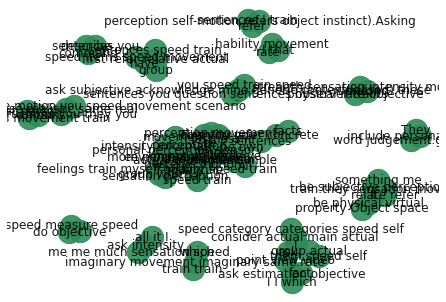

In [ ]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()




if __name__ == "__main__":

    text = "This group has to do with the speed of the train." \
    "contains items relating to speed of movement." \
    "All involve speed and velocity, most simple questions." \
    "This is about how you perceive your perception of movement." \
    "These instructions are based on the assumption that you felt a realistic sense of motion and they are asking you to rate the speed of that movement the same way you would in a real world scenario." \
    "It's about rating a physical property of an Object in a virtual space." \
    "More about feeling/perception of the whole environment." \
    "These sentences are all about my own speed." \
    "I grouped them based on actual speed of the self (3 sentences) and the vehicle (3 sentences). I considered actual speed as the main category here, then considered two sub categories as the actual speed of the self and the vehicle." \
    "The first group refers to all the sentences relative to the actual speed of the train." \
    "All about personal speed." \
    "The quantity of the fastness." \
    "it is about you moving." \
    "Actual movement." \
    "These sentences would refer to concrete facts. The speed and velocity are measurable." \
    "Perceived motion." \
    "Personal perception of motion." \
    "describes intensity, or quantity of sensory information." \
    "Decision-making about physical strength (intensity) of sensation or perception." \
    "its rating the objective intensity of the motion." \
    "Perception of movement." \
    "To do with the speed of the train." \
    "quasi-objective measure of speed i am travelling." \
    "It is related to the train." \
    "they refer to perception/sensation of movement. It's the subjective perception of something happening external to me." \
    "Here I am being asked to estimate how fast I am going, which is my estimation of some objective fact." \
    "Contains sentences that refer to how a person perceives the movement of the train." \
    "The speed of the train." \
    "Measuring perceived speed and movement." \
    "Here I am rating my hability to assess the movement that is occurring." \
    "Related to my feelings of the train, rather than myself." \
    "quality of the speed of the train." \
    "All sentences refer to the perception of self-motion." \
    "refers to the object moving (but I went with instinct)." \
    "Asking what speed the train is going." \
    "They all included the word fast and seems to be based on personal judgement." \
    "grouping together sensation related questions together." \
    "sensation = perceived." \
    "This group relates to sensation, which I think is subtly different from perception. For me these all ask me to rate how much it 'feels' as though I'm moving- the intensity of that sensation, rather than the speed itself." \
    "Train only." \
    "These sentences describe a command to subjectively evaluate how fast you are going. All sentences ask you how fast you are going, from your subjective perspective." \
    "perceived speed of train  (acknowledges subjectivity)" \
    "The question is about speed either mine or a generic perception (not contextualised)." \
    "These sentences are about how fast the observer thinks the train is moving." \
    "Quantifies the speed of the train." \
    "Asked to rate how fast I was moving, at least from the point of view shown in the video." \
    "Imaginary movement of the imaginary me and imaginary train which are the same." \
    "rating the train, describing the train only."

    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))

    printGraph(triples)